# Parse Rust Code Using Python

In [1]:
from typing import Iterable
import math
from pathlib import Path
import re
import itertools as it
import pandas as pd
import yaml
from aiutil.filesystem import replace_patterns
from utils import format_id, to_id, rust_files

## Check Parquet Files

In [2]:
dir_ = "_16_highcard_flush_j0_highcard_ma0eqma1"
df = pd.read_parquet(f"{dir_}/part-000.parquet")
df["row0"] = [format_id(id_) for id_ in df.id0]
df["row1"] = [format_id(id_) for id_ in df.id1]
df["row2"] = [format_id(id_) for id_ in df.id2]
df

,id0,id1,id2,score_r4_it,row0,row1,row2
0,2097154,420,7248,6.759744,3d Tc,4d 7d 9d Td,6d 8d Qd Kd Ad
1,2097156,480,4503599628238848,8.385301,4d Tc,7d 8d 9d Td,3c 5c 7c 8c 2j
2,33587200,5440,4503875042213896,17.435783,4c Ac,8d Td Qd Ad,5d 5c 5h Ah 2j
3,2097154,404,92408905728,7.465197,3d Tc,4d 6d 9d Td,2h 7h 8h Th Qh
4,34603008,4632,133143986176,27.787353,9c Ac,5d 6d Jd Ad,8h 9h Th Jh Qh
...,...,...,...,...,...,...,...
33573,4456448,538,414799888384,9.561624,7c Jc,3d 5d 6d Jd,2h 4h 7h Kh Ah
33574,25165824,2062,13510798882111600,17.256668,Qc Kc,3d 4d 5d Kd,6d 7d 8d 2j 3j
33575,4456448,650,48049946624,7.651892,7c Jc,3d 5d 9d Jd,4h 5h 8h 9h Jh
33576,8388672,1066,50675712,11.180078,8d Qc,3d 5d 7d Qd,3c 5c 7c Kc Ac


## Find Source Files with Multiple `pub(super)`

In [2]:
for path in rust_files():
    if path.read_text().count("pub(super)") > 1:
        print(path)

src/pineapple/play/_16/_16_highcard/_16_highcard_flush/_16_highcard_flush_j0_highcard/_16_highcard_flush_j0_highcard_ma0gtma1.rs
src/pineapple/play/_17/_17_pair/_17_pair_pair/_17_pair_j0_pair_r1gtr2.rs


## Find Pattern `let mut x = x;`

In [53]:
for path in rust_files():
    with path.open() as fin:
        for line in fin:
            line = line.strip()
            if line.startswith("let mut"):
                words = line[7:-1].strip().split(" = ")
                if len(words) > 1 and words[0] == words[1]:
                    print(line)

## Find Pattern `let x = x ...`

In [6]:
for path in rust_files():
    with path.open() as fin:
        for idx, line in enumerate(fin, 1):
            line = line.strip()
            if line.startswith("let "):
                words = line[4:].replace(" = ", " ").strip().split(" ")
                if len(words) > 1 and words[0] == words[1]:
                    print(f"{path}:L{idx}\n    {line}")

src/hand_type.rs:L104
    let mod_ = mod_ as usize;
src/hand_type.rs:L105
    let dups = dups as usize;
src/hand_type.rs:L186
    let mod_ = mod_ as usize;
src/hand_type.rs:L187
    let dups = dups as usize;
src/hand_type.rs:L188
    let rs = rs
src/hand_type.rs:L232
    let id = id & FiveCardRankLookup::NORMALCARDS;
src/hand_type.rs:L243
    let id = id & FiveCardRankLookup::NORMALCARDS;
src/pineapple/play.rs:L812
    let s0 = s0 as i16 as f64 + fantasy_score_row_zero(s0);
src/pineapple/play.rs:L843
    let s0 = s0 as i16 as f64 + fantasy_score_row_zero(s0);
src/pineapple/play.rs:L852
    let index = index - 1;
src/pineapple/play.rs:L856
    let s0 = s0 as i16 as f64 + fantasy_score_row_zero(s0);
src/pineapple/play/_16/_16_set/_16_set_j1/_16_set_j1_set/_16_set_j1_set_j1.rs:L112
    let cltma1 = cltma1 - cmi1;
src/pineapple/play/_16/_16_set/_16_set_j1/_16_set_j1_set/_16_set_j1_set_j1.rs:L316
    let cltma1 = cltma1 - cmi1;
src/pineapple/play/_16/_16_set/_16_set_j1/_16_set_j1_set/_16_se

## Find `b(cs[i], 2)` and `b(cs[i], 3)`

In [54]:
for path in rust_files():
    with path.open() as fin:
        for idx, line in enumerate(fin):
            line = line.strip()
            if re.search(r"b\(cs\[\w+\], \d?\)", line):
                print(path, f":L{idx + 1}", sep="")
                print("    " + line)

## Find Pattern of `(a * b)`

In [55]:
for path in rust_files():
    with path.open() as fin:
        for idx, line in enumerate(fin):
            line = line.strip()
            if re.search(r"\([^+\(\)-]*\*[^+\(\)-]*\)", line):
                print(path, f":L{idx + 1}", sep="")
                print("    " + line)

src/hand_type.rs:L225
    (rank >> (4 * n) & 0b1111) as u8
src/main.rs:L47
    play.set_ids(*id0, *id1, *id2);
src/main.rs:L89
    play.set_ids(*id0, *id1, *id2);
src/rank_calc.rs:L61
    r << (4 * i)
src/rank_calc.rs:L251
    let rank = (0usize..5).map(|i| rank_freq[i].1 << 4 * i).sum::<u32>();
src/pineapple/play.rs:L1223
    cards.push(*card);
src/pineapple/strategy/fantasy.rs:L202
    self.alternative_plays.push(*play);


## Find Pattern of `{a * b}`

In [56]:
for path in rust_files():
    with path.open() as fin:
        for idx, line in enumerate(fin):
            line = line.strip()
            if re.search(r"\{[^+\(\)-]*\*[^+\(\)-]*\}", line):
                print(path, f":L{idx + 1}", sep="")
                print("    " + line)

src/pineapple/play/_16/_16_set/_16_set_j1/_16_set_j1_boat/_16_set_j1_boat_j1.rs:L110
    score01 += b(cma1, 2) * { cltma1 * spma1_boat };


## Find `for` Loops Which Should Be Written in Functional-style

In [57]:
flag = True
for path in rust_files():
    with path.open() as fin:
        lines = fin.readlines()
    for idx, line in enumerate(lines):
        if re.search(r"^\s*for ", line):
            end_for = " " * line.index("for ") + "}"
            inner = it.takewhile(lambda line: not line.startswith(end_for), lines[(idx + 1):])
            inner = (s for line in inner if (s := line.strip()) != "")
            variables = (m.groups(0)[0] for line in inner if (m := re.search(r"(\w+) (-|\+)=", line))) 
            variables = list(set(variables))
            if len(variables) == 1 and variables[0].startswith("s"):
                print(path, f":L{idx + 1}", sep="")
                print("    " + line)

## Find Non-necessary `.filter`

In [58]:
for path in rust_files():
    with path.open() as fin:
        for idx, line in enumerate(fin):
            line = line.strip()
            if re.search(r".filter\(", line):
                for kwd in ["ma0", "mi0", "th0", "ma1", "mi1", "th1", "ft1", "fi1", "ma2", "mi2", "th2", "ft2", "fi2"]:
                    if line.count(kwd) > 1:
                        print(path, f":L{idx + 1}", sep="")
                        print("    " + line)
                        print("    " + kwd)

src/pineapple/play/_16/_16_set/_16_set_j0/_16_set_j0_set/_16_set_j0_set_j1.rs:L199
    let cltma1 = (2..ma1).filter(|&i| i != mi1).map(|i| c[i]).sum::<f64>();
    ma1
src/pineapple/play/_16/_16_set/_16_set_j0/_16_set_j0_set/_16_set_j0_set_j1.rs:L275
    let cltma0 = (2..ma0).filter(|&i| i != mi1).map(|i| c[i]).sum::<f64>();
    ma0
src/pineapple/play/_16/_16_set/_16_set_j0/_16_set_j0_set/_16_set_j0_set_j1.rs:L358
    let cltma1 = (2..ma1).filter(|&i| i != mi1).map(|i| c[i]).sum::<f64>();
    ma1


## Parse Test Cases

In [61]:
cases = parse_test_cases()
df = pd.DataFrame({
    "case": cases,
    "ids": (tuple(to_id(row) for row in case.split(",")) for case in cases)
})
dups = df.groupby("ids").count().reset_index().rename(columns={
    "case": "count"
})
dups = dups[dups["count"] > 1]
df.merge(dups, on="ids").drop_duplicates()

,case,ids,count


Dump all test cases.

In [62]:
Path("data/plays.csv").write_text("\n".join(cases))

132826

## Update Rust Files in Batch

In [36]:
def index_for_loop(lines: list[str], start: int) -> int | None:
    for i in range(start, len(lines)):
        line = lines[i].strip()
        if line.startswith("for i in ") and ".." in line:
            return i
    return None


def loop_to_iterator(path: Path):
    with path.open(encoding="utf-8") as fin:
        lines = fin.readlines()
    start = 0
    while (index := index_for_loop(lines, start)) is not None:
        start = fix_for_loop(lines, index, path)
    with path.open("w", encoding="utf-8") as fout:
        fout.writelines(lines)


def index_for_loop_end(lines: list[str], start: int) -> int | None:
    indent = lines[start].index("f")
    for i in range(start+1, len(lines)):
        if lines[i] == " " * indent + "}\n":
            return i
    return None


def has_return(lines: list[str], start: int, end: int):
    for line in lines[start:end+1]:
        if line.strip().startswith("return "):
            return True
    return False


def fix_for_loop(lines: list[str], start: int, path: Path) -> int:
    end = index_for_loop_end(lines, start)
    if end is None:
        raise ValueError(f"The for loop at {path}:{start+1} is not closed!")
    if not has_return(lines, start, end):
        indent = lines[start].index("f")
        lines[start] = fix_for_loop_begin(lines[start])
        lines[end] = " " * indent + "});\n"
    return end + 1


def fix_for_loop_begin(line: str):
    indent = line.index("f")
    line = line.strip()[8:-1].strip()
    if line.endswith(")"):
        return " " * indent + f"{line}.for_each(|i| " + "{\n"
    return " " * indent + f"({line}).for_each(|i| " + "{\n"

In [37]:
for path in rust_files():
    loop_to_iterator(path)

In [10]:
for path in rust_files():
    replace_patterns(path, pattern=r"\.\.=(\w+)\)", repl=r"..\1+1)")

In [5]:
for path in rust_files():
    update_file(path, regex=[
        (r"(RowOneScore::.* as) u8", r"\1 i32"),
    ])

## Analyze `bench.csv`

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("benchmark/bench.csv")
df

,id0,id1,id2,row0,row1,row2,time_ana,time_sim,time_sim_unopt,time_it_1k,time_it
0,9007474132647936,7424,4362862139015168,3j Ah,Ad Kd Qd Td,As Ks Qs Js Ts,0.480875,0.475682,2.416853,0.086957,1.073141
1,9007474132647936,6912,4362862139015168,3j Ah,Ad Kd Jd Td,As Ks Qs Js Ts,0.479887,0.478328,2.431753,0.087091,1.074796
2,9007474132647936,5888,4362862139015168,3j Ah,Ad Qd Jd Td,As Ks Qs Js Ts,0.495625,0.492480,2.527141,0.088062,1.086770
3,9007474132647936,3840,4362862139015168,3j Ah,Kd Qd Jd Td,As Ks Qs Js Ts,0.526853,0.524238,2.545482,0.083611,1.031848
4,9007203549708288,7680,4362862139015168,3j 8h,Ad Kd Qd Jd,As Ks Qs Js Ts,0.494539,0.491844,2.589859,0.088578,1.093144
...,...,...,...,...,...,...,...,...,...,...,...
4020,268435456,826781220928,31465472,4h,8d Ah 3c 2s 7h,2c Kc Qc Jc Tc,0.000956,0.906630,1.598681,0.564049,6.960933
4021,2251799813685248,9007217508876416,8590000232,As,Th 9d 8c 6h 3j,9h 8d 7d 5c 5d,0.001012,0.842834,1.658542,0.517616,6.387897
4022,4503599627370496,1126451810156608,31465472,2j,8d Ks 3c 2s 7h,2c Kc Qc Jc Tc,0.001102,1.191778,1.892658,0.732199,9.036070
4023,4503599627370496,826781220928,31465472,2j,8d Ah 3c 2s 7h,2c Kc Qc Jc Tc,0.000780,1.161557,1.859225,0.717006,8.848569


<AxesSubplot:>

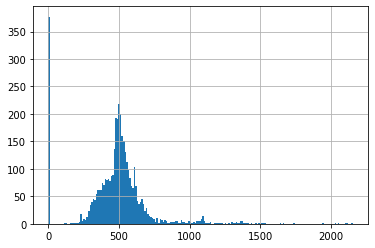

In [9]:
(df.time_sim / df.time_ana).hist(bins=200)

In [6]:
df.time_sim / df.time_it_1k

0    5.812807
1    5.680261
2    5.841190
3    6.497544
4    5.756116
5    5.734255
6    5.726456
7    5.729714
8    5.959022
9    5.566197
dtype: float64

In [6]:
(df.time_sim_unopt / df.time_it).mean()

1.3390916931082968

In [43]:
!ls data/*.parquet

data/rank_j0.parquet  data/rank_j1.parquet  data/rank_j2.parquet


In [44]:
import pandas as pd

In [53]:
df = pd.read_parquet("data/rank_j1.parquet")
df["rank"].str.count(" ").value_counts()

13    291331
22      2860
12        13
Name: rank, dtype: int64

In [54]:
df = pd.read_parquet("data/rank_j2.parquet")
df["rank"].str.count(" ").value_counts()

91     22283
136     1144
90        52
Name: rank, dtype: int64

In [31]:
def build_index(indexes):
    n = len(indexes)
    index = [0] * (n + 1)
    for i in range(n):
        index[i+1] = index[i] + len(indexes[i])
    return index


def build_place3_1(arr):
    i, j, k = arr
    return k << 16 | j << 8 | i


def build_place3(indexes):
    indexes = [arr for arr in indexes if arr]
    indexes = [a for arr in indexes for a in arr]
    return [build_place3_1(arr) for arr in indexes]

In [28]:
indexes = [
    [
        [3, 0, 0],
        [1, 2, 0],
        [2, 1, 0],
        [0, 3, 0],
        [5, 0, 0],
        [1, 4, 0],
        [4, 1, 0],
        [0, 5, 0],
        [6, 0, 0],
        [2, 4, 0],
        [4, 2, 0],
        [0, 6, 0],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [3, 0, 0],
        [1, 0, 2],
        [2, 0, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 0, 4],
        [4, 0, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 0, 4],
        [4, 0, 2],
        [0, 0, 6],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [3, 0, 0],
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [5, 0, 0],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [6, 0, 0],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [],
    [
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [1, 2, 0],
        [1, 0, 2],
        [2, 1, 0],
        [0, 3, 0],
        [0, 1, 2],
        [2, 0, 1],
        [0, 2, 1],
        [0, 0, 3],
        [1, 4, 0],
        [1, 0, 4],
        [4, 1, 0],
        [0, 5, 0],
        [0, 1, 4],
        [4, 0, 1],
        [0, 4, 1],
        [0, 0, 5],
        [2, 4, 0],
        [2, 0, 4],
        [4, 2, 0],
        [0, 6, 0],
        [0, 2, 4],
        [4, 0, 2],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [],
    [],
    [
        [0, 3, 0],
        [0, 1, 2],
        [0, 2, 1],
        [0, 0, 3],
        [0, 5, 0],
        [0, 1, 4],
        [0, 4, 1],
        [0, 0, 5],
        [0, 6, 0],
        [0, 2, 4],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [0, 3, 0],
        [0, 1, 2],
        [0, 2, 1],
        [0, 0, 3],
        [0, 5, 0],
        [0, 1, 4],
        [0, 4, 1],
        [0, 0, 5],
        [0, 6, 0],
        [0, 2, 4],
        [0, 4, 2],
        [0, 0, 6],
    ], 
    [
        [0, 3, 0],
        [0, 1, 2],
        [0, 2, 1],
        [0, 0, 3],
        [0, 5, 0],
        [0, 1, 4],
        [0, 4, 1],
        [0, 0, 5],
        [0, 6, 0],
        [0, 2, 4],
        [0, 4, 2],
        [0, 0, 6],
    ], 
]

In [29]:
build_index(indexes)

[0,
 12,
 36,
 63,
 90,
 114,
 126,
 150,
 177,
 204,
 231,
 255,
 255,
 279,
 303,
 327,
 351,
 351,
 351,
 363,
 375,
 387]

In [30]:
build_place3(indexes)

[3,
 513,
 258,
 768,
 5,
 1025,
 260,
 1280,
 6,
 1026,
 516,
 1536,
 3,
 513,
 131073,
 258,
 768,
 131328,
 65538,
 66048,
 5,
 1025,
 262145,
 260,
 1280,
 262400,
 65540,
 66560,
 6,
 1026,
 262146,
 516,
 1536,
 262656,
 131076,
 132096,
 3,
 513,
 131073,
 258,
 768,
 131328,
 65538,
 66048,
 196608,
 5,
 1025,
 262145,
 260,
 1280,
 262400,
 65540,
 66560,
 327680,
 6,
 1026,
 262146,
 516,
 1536,
 262656,
 131076,
 132096,
 393216,
 3,
 513,
 131073,
 258,
 768,
 131328,
 65538,
 66048,
 196608,
 5,
 1025,
 262145,
 260,
 1280,
 262400,
 65540,
 66560,
 327680,
 6,
 1026,
 262146,
 516,
 1536,
 262656,
 131076,
 132096,
 393216,
 3,
 513,
 131073,
 258,
 131328,
 65538,
 66048,
 196608,
 5,
 1025,
 262145,
 260,
 262400,
 65540,
 66560,
 327680,
 6,
 1026,
 262146,
 516,
 262656,
 131076,
 132096,
 393216,
 3,
 131073,
 65538,
 196608,
 5,
 262145,
 65540,
 327680,
 6,
 262146,
 131076,
 393216,
 3,
 513,
 131073,
 258,
 768,
 131328,
 65538,
 66048,
 5,
 1025,
 262145,
 260,


In [32]:
indexes = [
        [7, 24, 0],
        [7, 8, 16],
        [7, 16, 8],
        [7, 0, 24],
        [11, 20, 0],
        [11, 4, 16],
        [19, 12, 0],
        [3, 28, 0],
        [3, 12, 16],
        [19, 4, 8],
        [3, 20, 8],
        [3, 4, 24],
        [11, 16, 4],
        [11, 0, 20],
        [19, 8, 4],
        [3, 24, 4],
        [3, 8, 20],
        [19, 0, 12],
        [3, 16, 12],
        [3, 0, 28],
        [13, 18, 0],
        [13, 2, 16],
        [21, 10, 0],
        [5, 26, 0],
        [5, 10, 16],
        [21, 2, 8],
        [5, 18, 8],
        [5, 2, 24],
        [25, 6, 0],
        [9, 22, 0],
        [9, 6, 16],
        [17, 14, 0],
        [1, 30, 0],
        [1, 14, 16],
        [17, 6, 8],
        [1, 22, 8],
        [1, 6, 24],
        [25, 2, 4],
        [9, 18, 4],
        [9, 2, 20],
        [17, 10, 4],
        [1, 26, 4],
        [1, 10, 20],
        [17, 2, 12],
        [1, 18, 12],
        [1, 2, 28],
        [13, 16, 2],
        [13, 0, 18],
        [21, 8, 2],
        [5, 24, 2],
        [5, 8, 18],
        [21, 0, 10],
        [5, 16, 10],
        [5, 0, 26],
        [25, 4, 2],
        [9, 20, 2],
        [9, 4, 18],
        [17, 12, 2],
        [1, 28, 2],
        [1, 12, 18],
        [17, 4, 10],
        [1, 20, 10],
        [1, 4, 26],
        [25, 0, 6],
        [9, 16, 6],
        [9, 0, 22],
        [17, 8, 6],
        [1, 24, 6],
        [1, 8, 22],
        [17, 0, 14],
        [1, 16, 14],
        [1, 0, 30],
        [14, 17, 0],
        [14, 1, 16],
        [22, 9, 0],
        [6, 25, 0],
        [6, 9, 16],
        [22, 1, 8],
        [6, 17, 8],
        [6, 1, 24],
        [26, 5, 0],
        [10, 21, 0],
        [10, 5, 16],
        [18, 13, 0],
        [2, 29, 0],
        [2, 13, 16],
        [18, 5, 8],
        [2, 21, 8],
        [2, 5, 24],
        [26, 1, 4],
        [10, 17, 4],
        [10, 1, 20],
        [18, 9, 4],
        [2, 25, 4],
        [2, 9, 20],
        [18, 1, 12],
        [2, 17, 12],
        [2, 1, 28],
        [28, 3, 0],
        [12, 19, 0],
        [12, 3, 16],
        [20, 11, 0],
        [4, 27, 0],
        [4, 11, 16],
        [20, 3, 8],
        [4, 19, 8],
        [4, 3, 24],
        [24, 7, 0],
        [8, 23, 0],
        [8, 7, 16],
        [16, 15, 0],
        [0, 31, 0],
        [0, 15, 16],
        [16, 7, 8],
        [0, 23, 8],
        [0, 7, 24],
        [24, 3, 4],
        [8, 19, 4],
        [8, 3, 20],
        [16, 11, 4],
        [0, 27, 4],
        [0, 11, 20],
        [16, 3, 12],
        [0, 19, 12],
        [0, 3, 28],
        [28, 1, 2],
        [12, 17, 2],
        [12, 1, 18],
        [20, 9, 2],
        [4, 25, 2],
        [4, 9, 18],
        [20, 1, 10],
        [4, 17, 10],
        [4, 1, 26],
        [24, 5, 2],
        [8, 21, 2],
        [8, 5, 18],
        [16, 13, 2],
        [0, 29, 2],
        [0, 13, 18],
        [16, 5, 10],
        [0, 21, 10],
        [0, 5, 26],
        [24, 1, 6],
        [8, 17, 6],
        [8, 1, 22],
        [16, 9, 6],
        [0, 25, 6],
        [0, 9, 22],
        [16, 1, 14],
        [0, 17, 14],
        [0, 1, 30],
        [14, 16, 1],
        [14, 0, 17],
        [22, 8, 1],
        [6, 24, 1],
        [6, 8, 17],
        [22, 0, 9],
        [6, 16, 9],
        [6, 0, 25],
        [26, 4, 1],
        [10, 20, 1],
        [10, 4, 17],
        [18, 12, 1],
        [2, 28, 1],
        [2, 12, 17],
        [18, 4, 9],
        [2, 20, 9],
        [2, 4, 25],
        [26, 0, 5],
        [10, 16, 5],
        [10, 0, 21],
        [18, 8, 5],
        [2, 24, 5],
        [2, 8, 21],
        [18, 0, 13],
        [2, 16, 13],
        [2, 0, 29],
        [28, 2, 1],
        [12, 18, 1],
        [12, 2, 17],
        [20, 10, 1],
        [4, 26, 1],
        [4, 10, 17],
        [20, 2, 9],
        [4, 18, 9],
        [4, 2, 25],
        [24, 6, 1],
        [8, 22, 1],
        [8, 6, 17],
        [16, 14, 1],
        [0, 30, 1],
        [0, 14, 17],
        [16, 6, 9],
        [0, 22, 9],
        [0, 6, 25],
        [24, 2, 5],
        [8, 18, 5],
        [8, 2, 21],
        [16, 10, 5],
        [0, 26, 5],
        [0, 10, 21],
        [16, 2, 13],
        [0, 18, 13],
        [0, 2, 29],
        [28, 0, 3],
        [12, 16, 3],
        [12, 0, 19],
        [20, 8, 3],
        [4, 24, 3],
        [4, 8, 19],
        [20, 0, 11],
        [4, 16, 11],
        [4, 0, 27],
        [24, 4, 3],
        [8, 20, 3],
        [8, 4, 19],
        [16, 12, 3],
        [0, 28, 3],
        [0, 12, 19],
        [16, 4, 11],
        [0, 20, 11],
        [0, 4, 27],
        [24, 0, 7],
        [8, 16, 7],
        [8, 0, 23],
        [16, 8, 7],
        [0, 24, 7],
        [0, 8, 23],
        [16, 0, 15],
        [0, 16, 15],
        [0, 0, 31],
    ]

In [33]:
[build_place3_1(arr) for arr in indexes]

[6151,
 1050631,
 528391,
 1572871,
 5131,
 1049611,
 3091,
 7171,
 1051651,
 525331,
 529411,
 1573891,
 266251,
 1310731,
 264211,
 268291,
 1312771,
 786451,
 790531,
 1835011,
 4621,
 1049101,
 2581,
 6661,
 1051141,
 524821,
 528901,
 1573381,
 1561,
 5641,
 1050121,
 3601,
 7681,
 1052161,
 525841,
 529921,
 1574401,
 262681,
 266761,
 1311241,
 264721,
 268801,
 1313281,
 786961,
 791041,
 1835521,
 135181,
 1179661,
 133141,
 137221,
 1181701,
 655381,
 659461,
 1703941,
 132121,
 136201,
 1180681,
 134161,
 138241,
 1182721,
 656401,
 660481,
 1704961,
 393241,
 397321,
 1441801,
 395281,
 399361,
 1443841,
 917521,
 921601,
 1966081,
 4366,
 1048846,
 2326,
 6406,
 1050886,
 524566,
 528646,
 1573126,
 1306,
 5386,
 1049866,
 3346,
 7426,
 1051906,
 525586,
 529666,
 1574146,
 262426,
 266506,
 1310986,
 264466,
 268546,
 1313026,
 786706,
 790786,
 1835266,
 796,
 4876,
 1049356,
 2836,
 6916,
 1051396,
 525076,
 529156,
 1573636,
 1816,
 5896,
 1050376,
 3856,
 7936,
 10524